# Model based clustering :  French Presidential election 2022 / 1st round (regional scale)

In [184]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import matplotlib as mpl
import pandas as pd
import plotly.express as px
import geopandas as gpd
import seaborn as sns
from sklearn import decomposition

# 1. Transformation et visualisation des données

In [153]:
data = pd.read_excel('data/resultats-par-niveau-reg-t1-france-entiere.xlsx')
columns = data.columns
columns

Index(['Code de la région', 'Libellé de la région', 'Etat saisie', 'Inscrits',
       'Abstentions', '% Abs/Ins', 'Votants', '% Vot/Ins', 'Blancs',
       '% Blancs/Ins', '% Blancs/Vot', 'Nuls', '% Nuls/Ins', '% Nuls/Vot',
       'Exprimés', '% Exp/Ins', '% Exp/Vot', 'Sexe', 'Nom', 'Prénom', 'Voix',
       '% Voix/Ins', '% Voix/Exp', 'Unnamed: 23', 'Unnamed: 24', 'Unnamed: 25',
       'Unnamed: 26', 'Unnamed: 27', 'Unnamed: 28', 'Unnamed: 29',
       'Unnamed: 30', 'Unnamed: 31', 'Unnamed: 32', 'Unnamed: 33',
       'Unnamed: 34', 'Unnamed: 35', 'Unnamed: 36', 'Unnamed: 37',
       'Unnamed: 38', 'Unnamed: 39', 'Unnamed: 40', 'Unnamed: 41',
       'Unnamed: 42', 'Unnamed: 43', 'Unnamed: 44', 'Unnamed: 45',
       'Unnamed: 46', 'Unnamed: 47', 'Unnamed: 48', 'Unnamed: 49',
       'Unnamed: 50', 'Unnamed: 51', 'Unnamed: 52', 'Unnamed: 53',
       'Unnamed: 54', 'Unnamed: 55', 'Unnamed: 56', 'Unnamed: 57',
       'Unnamed: 58', 'Unnamed: 59', 'Unnamed: 60', 'Unnamed: 61',
       'Unnamed:

## 1.2 Cleaning the data

In [154]:
#Renomme les colonnes associées aux résultats par candidat
old_names = ['Sexe', 'Nom', 'Prénom', 'Voix',
       '% Voix/Ins', '% Voix/Exp', 'Unnamed: 23', 'Unnamed: 24', 'Unnamed: 25',
       'Unnamed: 26', 'Unnamed: 27', 'Unnamed: 28', 'Unnamed: 29',
       'Unnamed: 30', 'Unnamed: 31', 'Unnamed: 32', 'Unnamed: 33',
       'Unnamed: 34', 'Unnamed: 35', 'Unnamed: 36', 'Unnamed: 37',
       'Unnamed: 38', 'Unnamed: 39', 'Unnamed: 40', 'Unnamed: 41',
       'Unnamed: 42', 'Unnamed: 43', 'Unnamed: 44', 'Unnamed: 45',
       'Unnamed: 46', 'Unnamed: 47', 'Unnamed: 48', 'Unnamed: 49',
       'Unnamed: 50', 'Unnamed: 51', 'Unnamed: 52', 'Unnamed: 53',
       'Unnamed: 54', 'Unnamed: 55', 'Unnamed: 56', 'Unnamed: 57',
       'Unnamed: 58', 'Unnamed: 59', 'Unnamed: 60', 'Unnamed: 61',
       'Unnamed: 62', 'Unnamed: 63', 'Unnamed: 64', 'Unnamed: 65',
       'Unnamed: 66', 'Unnamed: 67', 'Unnamed: 68', 'Unnamed: 69',
       'Unnamed: 70', 'Unnamed: 71', 'Unnamed: 72', 'Unnamed: 73',
       'Unnamed: 74', 'Unnamed: 75', 'Unnamed: 76', 'Unnamed: 77',
       'Unnamed: 78', 'Unnamed: 79', 'Unnamed: 80', 'Unnamed: 81',
       'Unnamed: 82', 'Unnamed: 83', 'Unnamed: 84', 'Unnamed: 85',
       'Unnamed: 86', 'Unnamed: 87', 'Unnamed: 88']
candidats = ['arthaud', 'roussel', 'macron', 'lassalle', 'lepen', 'zemmour', 'melenchon', 'hidalgo', 'jadot', 'pecresse', 'poutou', 'dupont_aignant']
labels = ['Sexe', 'Nom', 'Prénom', 'Voix', '%Voix/Ins', '%Voix/Exp']
new_names = [l + '_' + c for c in candidats for l in labels]
dict_rename = {old_names[i]: new_names[i] for i in range(len(new_names))}
data.rename(columns = dict_rename, inplace=True)
columns = data.columns
data

,Code de la région,Libellé de la région,Etat saisie,Inscrits,Abstentions,% Abs/Ins,Votants,% Vot/Ins,Blancs,% Blancs/Ins,...,Prénom_poutou,Voix_poutou,%Voix/Ins_poutou,%Voix/Exp_poutou,Sexe_dupont_aignant,Nom_dupont_aignant,Prénom_dupont_aignant,Voix_dupont_aignant,%Voix/Ins_dupont_aignant,%Voix/Exp_dupont_aignant
0,44,Grand Est,Complet,3862920,1008344,26.10,2854576,73.90,42255,1.09,...,Philippe,22241,0.58,0.80,M,DUPONT-AIGNAN,Nicolas,74916,1.94,2.68
1,75,Nouvelle-Aquitaine,Complet,4463041,962499,21.57,3500542,78.43,53440,1.20,...,Philippe,32597,0.73,0.95,M,DUPONT-AIGNAN,Nicolas,67645,1.52,1.98
2,84,Auvergne-Rhône-Alpes,Complet,5557535,1228490,22.10,4329045,77.90,70067,1.26,...,Philippe,30586,0.55,0.72,M,DUPONT-AIGNAN,Nicolas,98446,1.77,2.33
3,27,Bourgogne-Franche-Comté,Complet,1992409,456682,22.92,1535727,77.08,26392,1.32,...,Philippe,12738,0.64,0.85,M,DUPONT-AIGNAN,Nicolas,38691,1.94,2.58
4,53,Bretagne,Complet,2562061,543414,21.21,2018647,78.79,31884,1.24,...,Philippe,19913,0.78,1.01,M,DUPONT-AIGNAN,Nicolas,35116,1.37,1.78
5,24,Centre-Val de Loire,Complet,1837328,459528,25.01,1377800,74.99,23216,1.26,...,Philippe,11226,0.61,0.83,M,DUPONT-AIGNAN,Nicolas,31759,1.73,2.36
6,11,Île-de-France,Complet,7349284,1760727,23.96,5588557,76.04,76616,1.04,...,Philippe,33050,0.45,0.60,M,DUPONT-AIGNAN,Nicolas,87331,1.19,1.59
7,76,Occitanie,Complet,4323929,940541,21.75,3383388,78.25,47891,1.11,...,Philippe,23891,0.55,0.72,M,DUPONT-AIGNAN,Nicolas,63243,1.46,1.91
8,32,Hauts-de-France,Complet,4255350,1146209,26.94,3109141,73.06,42945,1.01,...,Philippe,21125,0.50,0.69,M,DUPONT-AIGNAN,Nicolas,55386,1.30,1.82
9,28,Normandie,Complet,2413749,590804,24.48,1822945,75.52,28947,1.20,...,Philippe,16005,0.66,0.90,M,DUPONT-AIGNAN,Nicolas,38560,1.60,2.16


In [155]:
# load the shapefile with the defined CRS
result_map = gpd.read_file("data/geodata/rВgions_2016.shp")
result_map["Code de la région"]=[52,32,93,75,44,28,84,53,27,94,24,76,11 ]
result_map["Code de la région"]=result_map["Code de la région"].astype(int).astype(str)
data["Code de la région"]=data["Code de la région"].astype(int).astype(str)
data = data.sort_values(by="Code de la région")
geo_data = pd.merge(data,result_map,on='Code de la région', how='left')
geo_data =gpd.GeoDataFrame(geo_data)


In [156]:
regions = data['Libellé de la région'].to_numpy()
#plt.bar(regions, 100 - data['% Vot/Ins'].to_numpy())
new_y=  (100 - data['% Vot/Ins']).to_numpy()
# plt.xticks(rotation=90);
# plt.title('Abstention %', fontweight="bold")

px.bar(x=regions, y=new_y, title="% Abstention ")


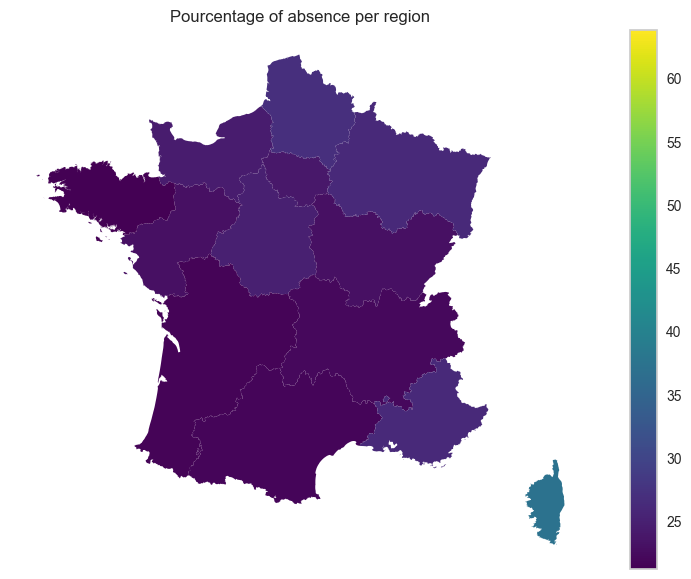

In [201]:
ax = geo_data.plot(column="% Abs/Ins",
    legend=True,
    figsize=(10, 7), cmap = 'viridis')
ax.set_title("Pourcentage of absence per region")
ax.set_axis_off()

In [158]:
len(candidats)

12

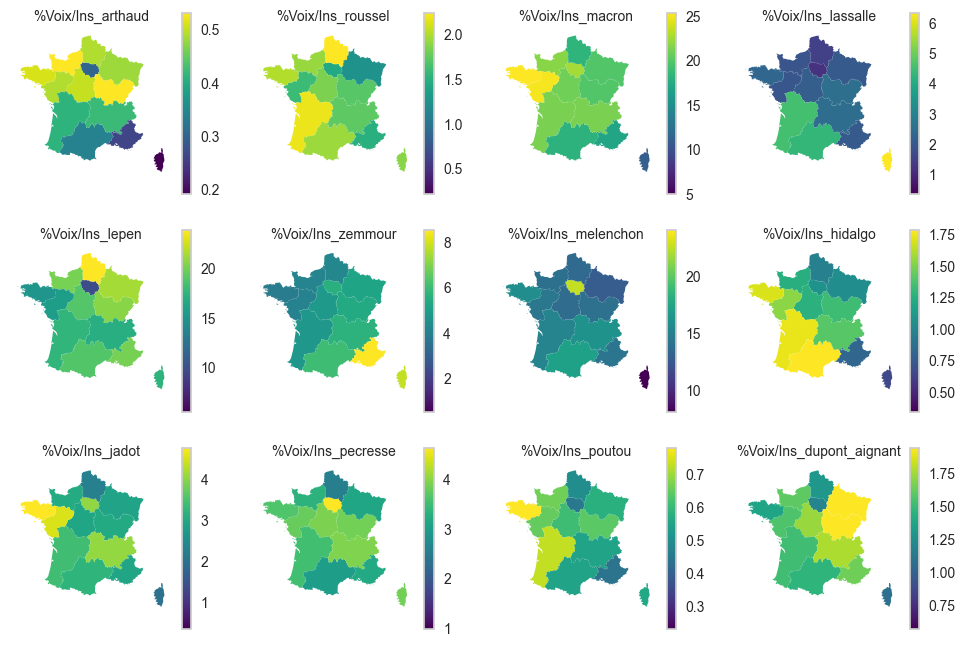

In [202]:
fig, axes = plt.subplots(3,4)
fig.set_size_inches((12,8))
labels = ['%Voix/Ins' + '_' + c for c in candidats]

for i, ax in enumerate(axes.flatten()):
    geo_data.plot(ax= ax, column="%Voix/Ins_"+candidats[i],
        legend=True,
        figsize=(10, 7), cmap = 'viridis'    
        )
    ax.set_title(labels[i],fontsize=10)
    ax.set_axis_off()

In [160]:
#Visualisation de la répartition des votes pour une région
data["Code de la région"]=data["Code de la région"].astype(int)
code_région = 52 #Code de la région à étudier

labels = ['%Voix/Ins' + '_' + c for c in candidats]
labels.append('% Abs/Ins')
labels.append('% Blancs/Ins')
subdata = data.loc[data['Code de la région'] == code_région]
subdata = subdata[labels]
y = subdata.to_numpy()[0] #La somme des % devrait faire ~100

labels1 = candidats + ['abstention', 'blanc']
# fig, ax = plt.subplots(figsize = (8,8))
c = list(mcolors.TABLEAU_COLORS) + ['magenta', 'turquoise', 'yellow', 'lightgrey']
#ax.pie(y, labels=labels1, autopct='%1.1f%%', colors = c);

fig = px.pie(values=y, names=labels1, title='Visualisation de la répartition des votes pour une région')
fig.show()


# 2. Premier clustering
## 2.1 Clustering hiérarchique

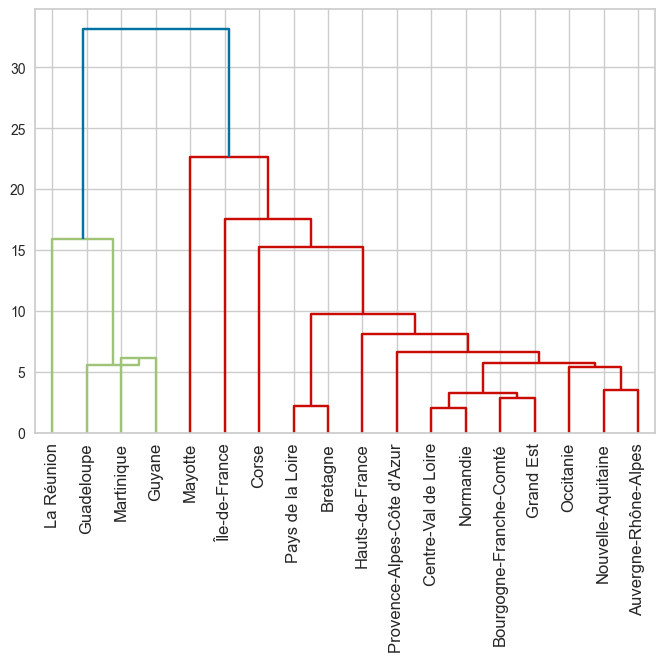

In [161]:
#Clustering hierarchique
from scipy.cluster.hierarchy import dendrogram, linkage

votes = ['%Voix/Exp' + '_' + c for c in candidats]
labels_region = data['Libellé de la région'].to_numpy()
subdata1_df = data[votes]
subdata1 = subdata1_df.to_numpy()
Z = linkage(y = subdata1, method='centroid', metric='euclidean');
dendrogram(Z, labels = labels_region, leaf_rotation = 90);

Le résultat semble cohérent étant donné que des régions d'outre mer comme la Martinique et la Guyanne ont voté en grande majorité Mélenchon, là où des régions comme le Grand Est et Bourgogne-Franche-Comté ont légèrement favorisé Lepen. Les Pays de la Loire et la Bretagne quant à eux ont voté Macron en majorité et se retouvent ainsi associé au début du dendrogramme.

Pour la suite, commençons par réaliser un clustering avec 3 clusters correspondant aux 3 candidats ayant obtenu le plus de suffrage : Macron, Lepen (+Zemmour?) et Mélenchon.

In [162]:
votes

['%Voix/Exp_arthaud',
 '%Voix/Exp_roussel',
 '%Voix/Exp_macron',
 '%Voix/Exp_lassalle',
 '%Voix/Exp_lepen',
 '%Voix/Exp_zemmour',
 '%Voix/Exp_melenchon',
 '%Voix/Exp_hidalgo',
 '%Voix/Exp_jadot',
 '%Voix/Exp_pecresse',
 '%Voix/Exp_poutou',
 '%Voix/Exp_dupont_aignant']

[1 0 1 0 0 0 1 0 1 0 0 0 2 0 0 0 0 0]


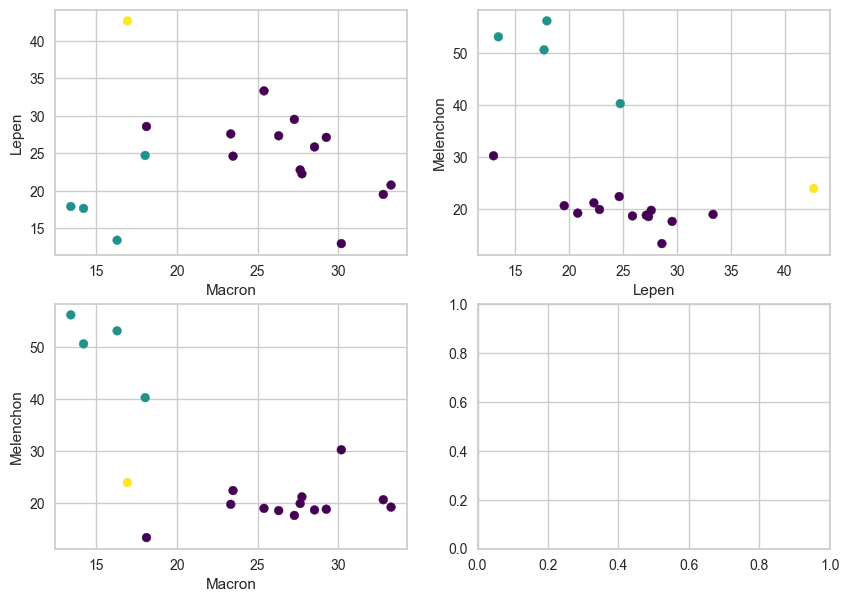

In [163]:
from sklearn.cluster import AgglomerativeClustering

hierarchical_cluster = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward')
clusters = hierarchical_cluster.fit_predict(subdata1)
#plt.scatter(subdata1[:, 4], subdata1[:, 6], c=clusters, s=40, cmap='viridis');
print(clusters)

fig, axs = plt.subplots(2, 2, figsize = (10,7))
axs[0,0].scatter(subdata1[:, 2], subdata1[:, 4], c=clusters, s=40, cmap='viridis')
axs[0,0].set_xlabel('Macron')
axs[0,0].set_ylabel('Lepen')
axs[0,1].scatter(subdata1[:, 4], subdata1[:, 6], c=clusters, s=40, cmap='viridis')
axs[0,1].set_xlabel('Lepen')
axs[0,1].set_ylabel('Melenchon')
axs[1,0].scatter(subdata1[:, 2], subdata1[:, 6], c=clusters, s=40, cmap='viridis')
axs[1,0].set_xlabel('Macron')
axs[1,0].set_ylabel('Melenchon')
plt.show()

Avec 3 clusters, le clustering hiérarchique ci-dessus a tendance à associer toutes les régions de France métropolitaine ensemble (cluster 0) puisque quel que soit le résultat, le % des voix exprimées en faveur de Macron, Lepen et Mélanchon sont plutôt équilibrés lorsqu'on les compare avec ceux des autres clusters.
En effet, les régions d'outre mer du cluster 1 ont voté en grande majorité Mélenchon, celle du cluster 2 Lepen.

Les régions d'outre mer de par leur résultats extrêmes (au sens des %) poussent les régions de France Métropolitaine à être dans le même cluster, alors que celles-ci présentent d'importantes différences dans les votes.  
C'est d'autant plus problématique que les régions d'outre mer ne représentent qu'une petite part des électeurs : par exemple, les résultats de la Guadeloupe, aussi majoritaires soient-ils, ne constituent que 300000 électeurs et ont évidemment moins d'impact sur l'élection que les 7 millions d'électeurs en île-de-France.  
Pour la suite, il sera donc important de réduire l'importance des régions d'outre mer dans la construction du clustering.

[1 0 1 0 2 0 1 2 1 2 0 0 2 0 0 0 2 2]


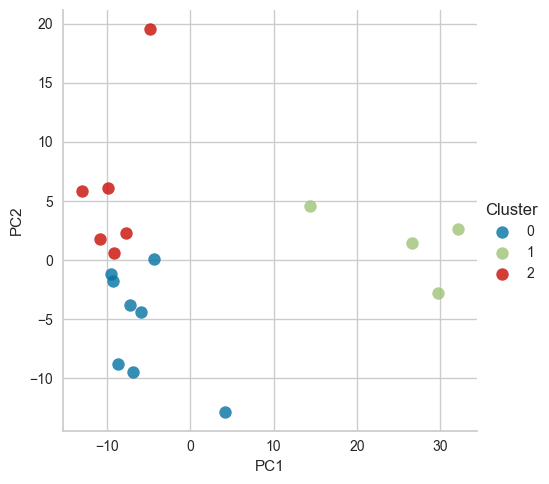

In [164]:
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist
pca = decomposition.PCA(n_components=3)
pc = pca.fit_transform(subdata1)

kmeans = KMeans(3, random_state=0)
clusters = kmeans.fit(subdata1).predict(subdata1)
print(clusters)
#plt.scatter(subdata1[:, 0], subdata1[:, 1], c=clusters, s=40, cmap='viridis');

pc_df = pd.DataFrame(data = pc , 
        columns = ['PC1', 'PC2','PC3'])
pc_df['Cluster'] = clusters
pc_df.head()
sns.lmplot( x="PC1", y="PC2",
  data=pc_df, 
  fit_reg=False, 
  hue='Cluster',
  legend=True,
  scatter_kws={"s": 80})

## 2.2 Séléction de modèle pour le clustering hierarchique

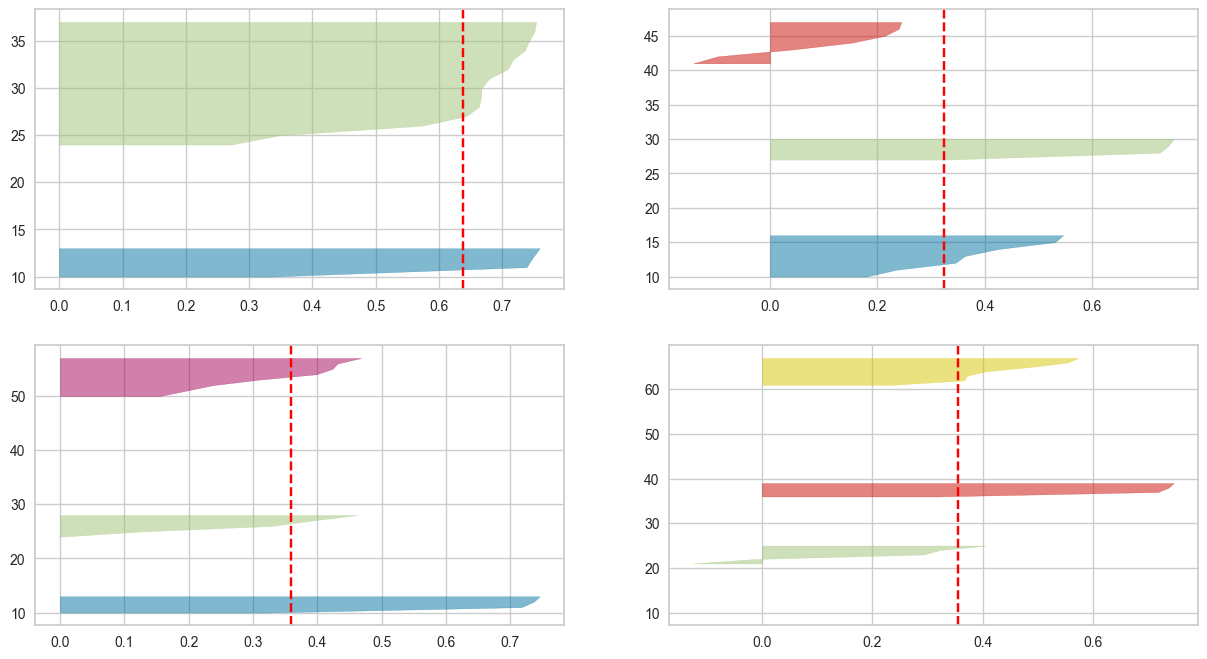

In [165]:
from yellowbrick.cluster import SilhouetteVisualizer
#Silhouette pour déterminer le nombre de clusters optimal
fig, ax = plt.subplots(2, 2, figsize=(15,8))
for i in [2, 3, 4, 5]:
    '''
    Create KMeans instance for different number of clusters
    '''
    km = KMeans(n_clusters=i, init='k-means++', n_init=10, max_iter=100, random_state=42)
    q, mod = divmod(i, 2) #quotient et reste dans la division euclidienne par 2 pour les coordonnées sur la figure
    '''
    Create SilhouetteVisualizer instance with KMeans instance
    Fit the visualizer
    '''
    visualizer = SilhouetteVisualizer(km, colors='yellowbrick', ax=ax[q-1][mod])
    visualizer.fit(subdata1)

Les silhouettes suggèrent que le nombre de clusters optimal est 2. Cela confirme nos observations sur les résultats du premier clustering, à savoir que les régions d'outre mer, en raison de leurs résultats extrèmes (au sens des %), polarisent les électorats entre régions d'outre mer (gros % en faveur de Mélenchon et abstention) et France métropolitaine (% plus équilibré).

## 2.3 Gaussian Mixture Model

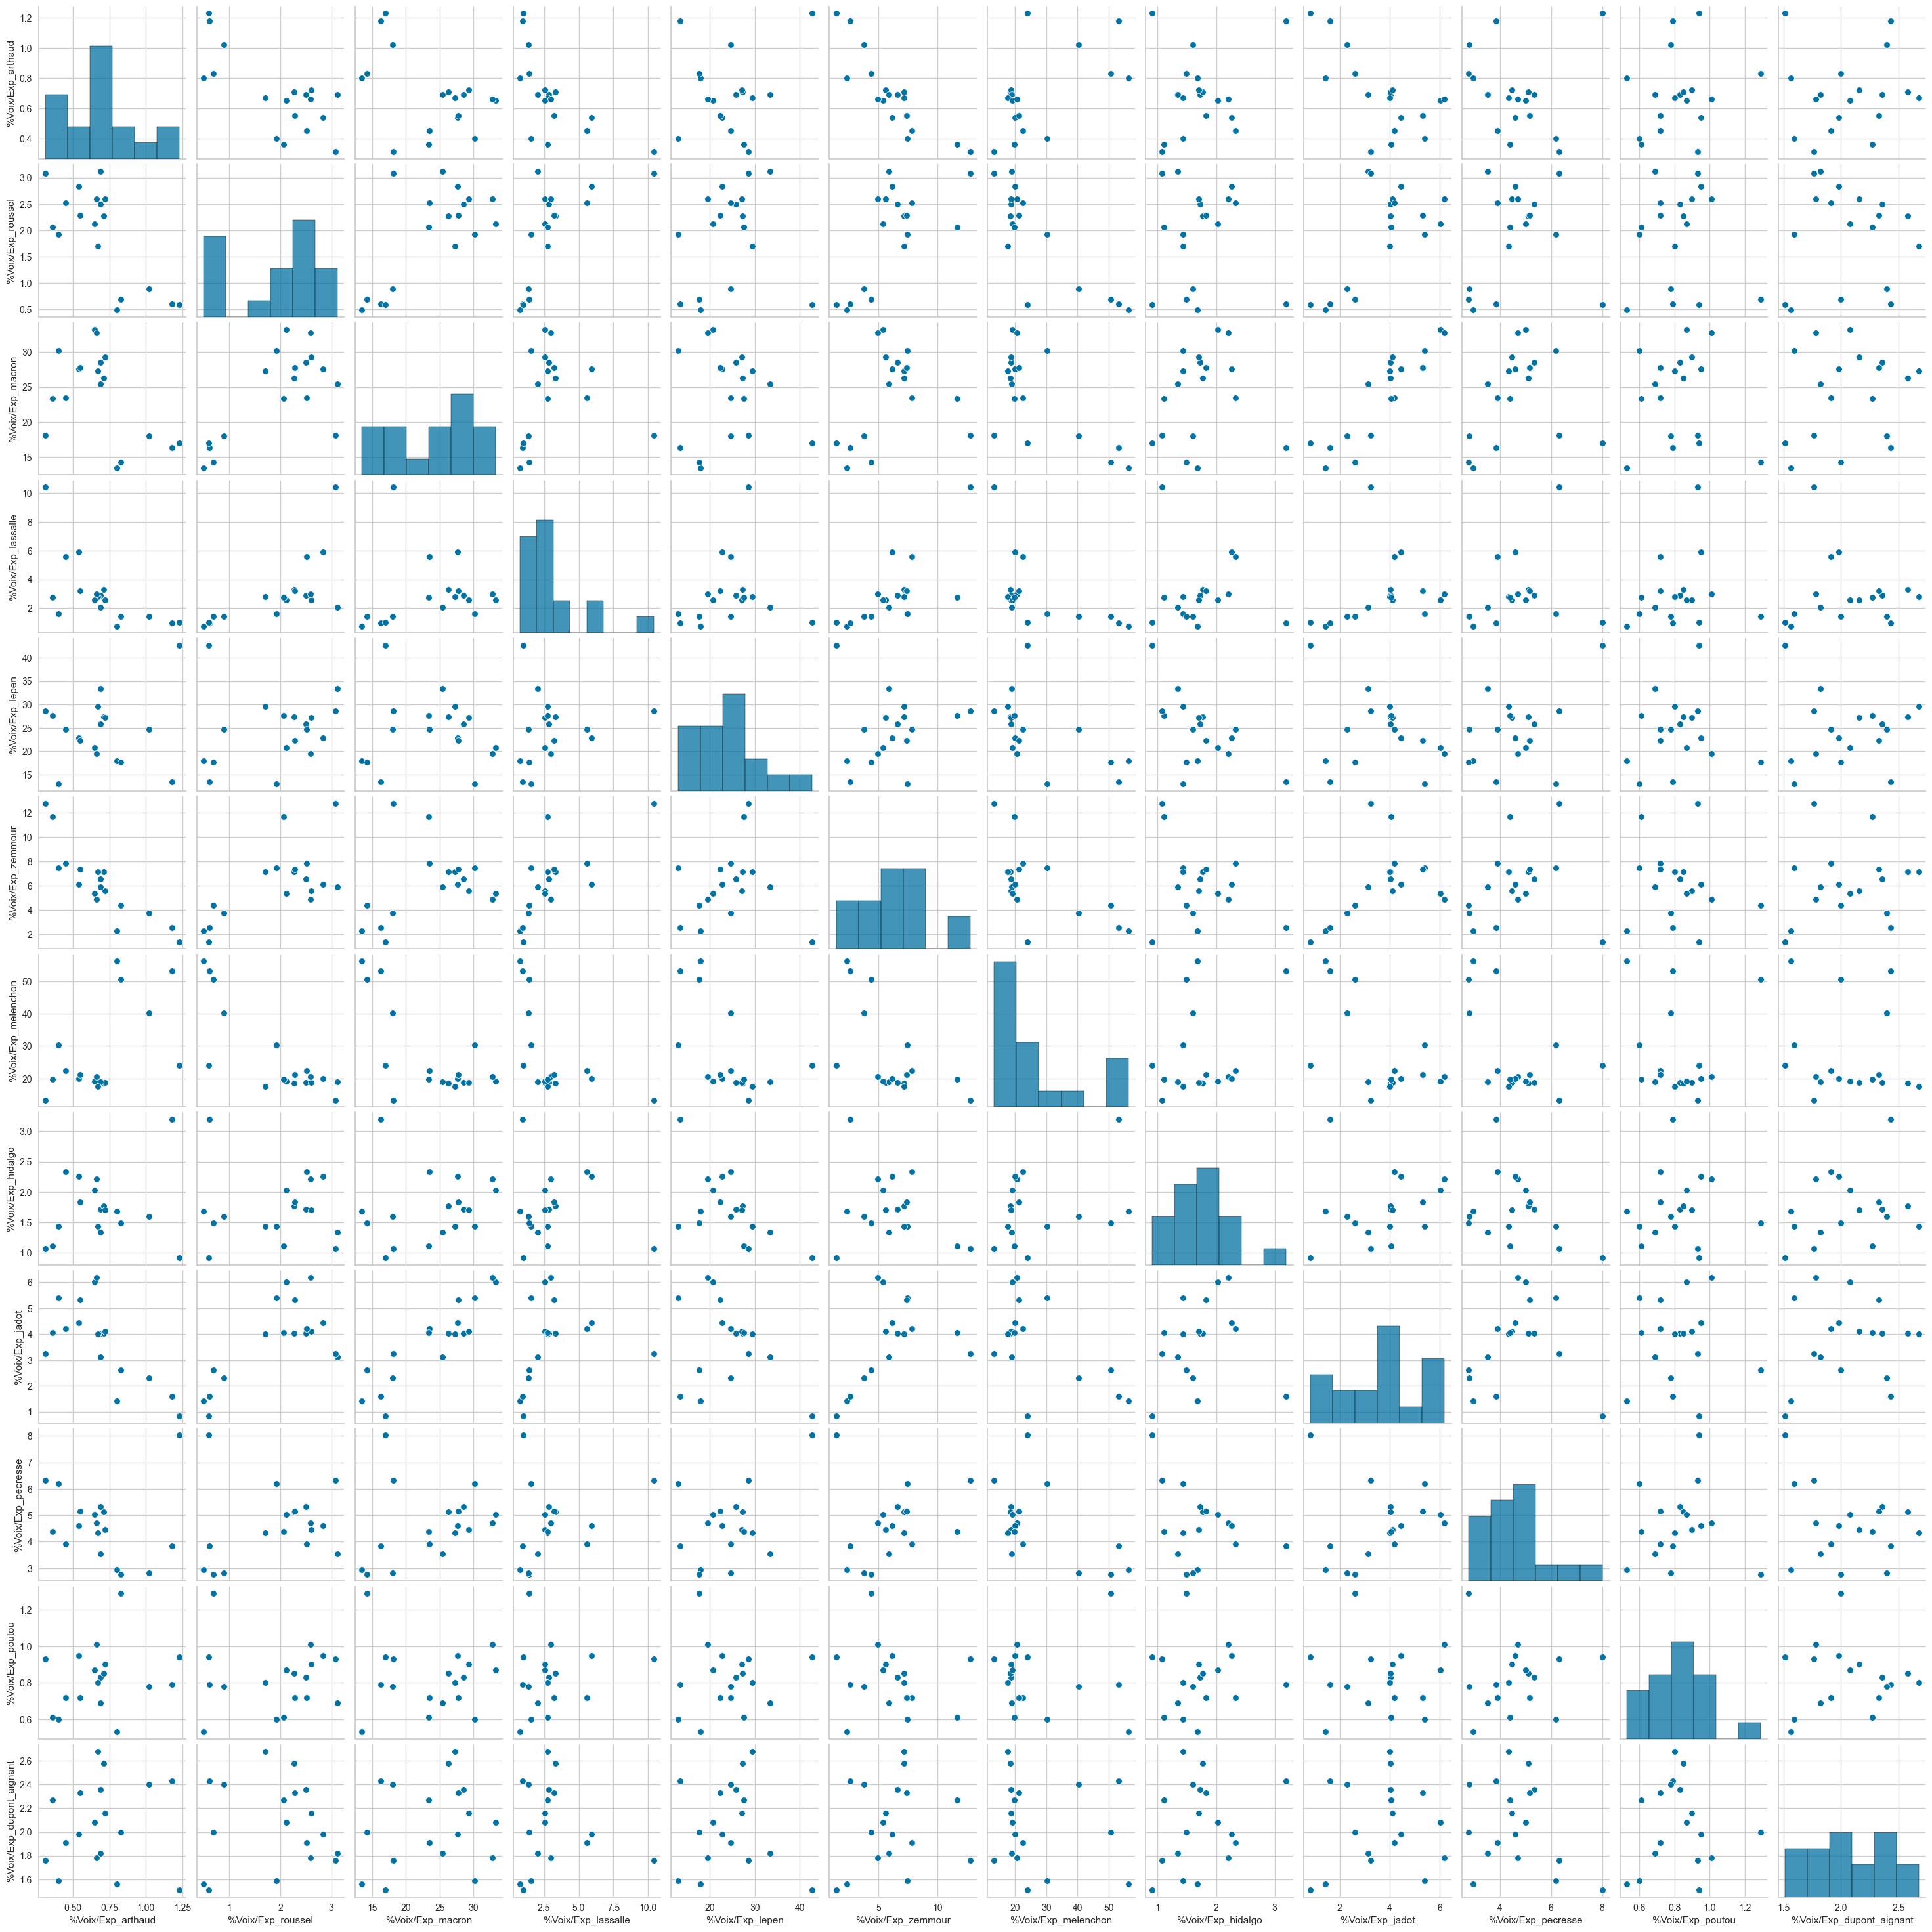

In [166]:
sns.pairplot(data[votes])

In [167]:
from sklearn.mixture import GaussianMixture
gmm = GaussianMixture(n_components=3).fit(subdata1)
clusters = gmm.predict(subdata1)
pc_df = pd.DataFrame(data = pc , 
        columns = ['PC1', 'PC2','PC3'])
pc_df['Cluster'] = clusters
pc_df.head()

,PC1,PC2,PC3,Cluster
0,32.166907,2.632399,-0.199574,1
1,4.141788,-12.804130,-0.081572,0
2,29.717229,-2.798181,0.425400,1
3,-9.222173,-1.780345,-1.408669,0
4,-9.161371,0.630804,-0.142319,0


In [168]:
pd.DataFrame(data = np.transpose([labels_region, clusters]), columns = ['Libellé de la région', 'cluster'])

,Libellé de la région,cluster
0,Guadeloupe,1
1,Île-de-France,0
2,Martinique,1
3,Centre-Val de Loire,0
4,Bourgogne-Franche-Comté,0
5,Normandie,0
6,Guyane,1
7,Hauts-de-France,0
8,La Réunion,1
9,Grand Est,0


Le clustering proposé par les gaussian mixtures est plus intéréssant que celui obtenu par clustering hiérarchique puisque les régions de France métropolitaine ne sont pas toutes regroupées.  
On retrouve toujours un cluster pour les régions d'outre mer (cluster 1) sans Mayotte, un custer plutôt en faveur d'Emmanuel Macron (cluster 2) et un dernier plutôt en faveur de Marine Lepen (cluster 0).

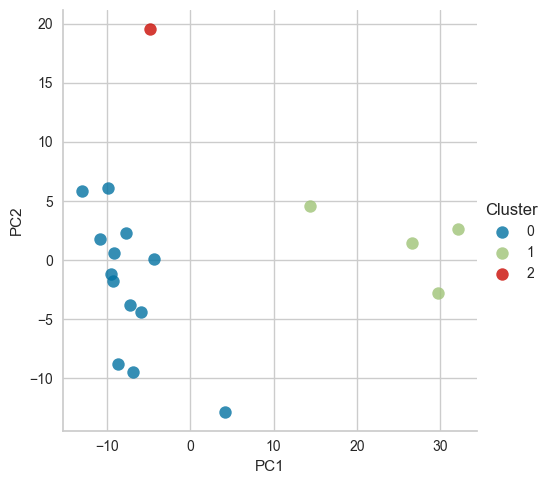

In [169]:
sns.lmplot( x="PC1", y="PC2",
  data=pc_df, 
  fit_reg=False, 
  hue='Cluster',
  legend=True,
  scatter_kws={"s": 80})

## 2.4 Selection de modèle pour les gaussian mixtures

In [170]:
#Score BIC
from sklearn.model_selection import GridSearchCV

def gmm_bic_score(estimator, X):
    return -estimator.bic(X) # Negatif car GridSearchCV cherche un score à maximiser


param_grid = {
    "n_components": range(1, 7),
    "covariance_type": ["spherical", "diag"],
}
grid_search = GridSearchCV(
    GaussianMixture(), param_grid=param_grid, scoring=gmm_bic_score
)
grid_search.fit(subdata1)

GridSearchCV(estimator=GaussianMixture(),
             param_grid={'covariance_type': ['spherical', 'diag'],
                         'n_components': range(1, 7)},
             scoring=<function gmm_bic_score at 0x000001CBC78284C0>)

In [171]:
df = pd.DataFrame(grid_search.cv_results_)[
    ["param_n_components", "param_covariance_type", "mean_test_score"]
]
df["mean_test_score"] = -df["mean_test_score"]
df = df.rename(
    columns={
        "param_n_components": "Number of components",
        "param_covariance_type": "Type of covariance",
        "mean_test_score": "BIC score",
    }
)
df.sort_values(by="BIC score").head()

,Number of components,Type of covariance,BIC score
6,1,diag,198.960804
1,2,spherical,273.128637
0,1,spherical,291.631167
2,3,spherical,307.680497
7,2,diag,315.037778


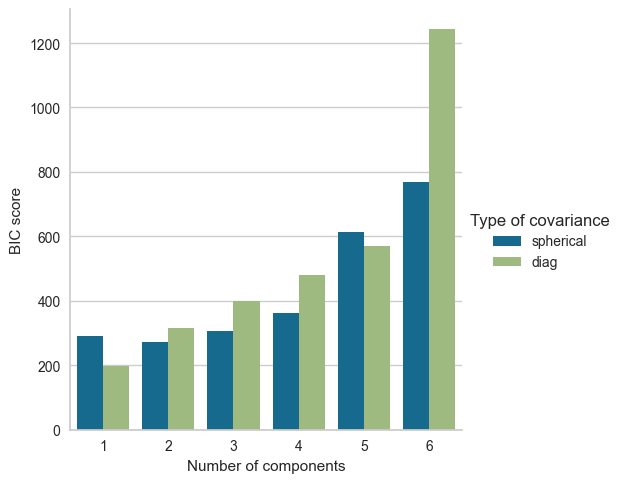

In [172]:
sns.catplot(
    data=df,
    kind="bar",
    x="Number of components",
    y="BIC score",
    hue="Type of covariance",
)
plt.show()

Il semblerait que plus on rajoute de composantes au modèle, plus le BIC se dégrade, ce qui est surprenant étant donné qu'on s'attend à avoir plusieurs clusters.
Dans le contexte d'élections, le clustering peut être utilisé afin de préparer plusieurs stratégies de campagnes suivant l'orientation politique des clusters. Nous avons vu que les territoires d'outre-mer ont obtenu des résultats uniques, avec une large majorité pour Jean-Luc-Mélanchon et un taux d'abstention bien supérieur à celui de France métropolitaine.  
On peut donc considérer que les territoires d'outre-mer sont un cluster à part entière (à l'exception de Mayotte qui a voté différemment) et appliquer les techniques de clustering précédentes uniquement sur la France métropolitaine.  
De cette manière, les territoire d'outre mer ne vont plus 'fausser' la construction des clusters et nous pourrons séparer les régions de France métropolitaine.

# 3. Clustering sur la France métropolitaine
## 3.1 Clustering hiérarchique

In [173]:
outre_mer = ['Guadeloupe', 'La Réunion', 'Martinique', 'Guyane', 'Mayotte']
votes = ['Libellé de la région']+['%Voix/Exp' + '_' + c for c in candidats]
subdata2 = data[votes]
subdata2 = subdata2.loc[np.logical_not(subdata2['Libellé de la région'].isin(outre_mer))]
subdata2 = subdata2.drop(columns = ['Libellé de la région']).to_numpy()

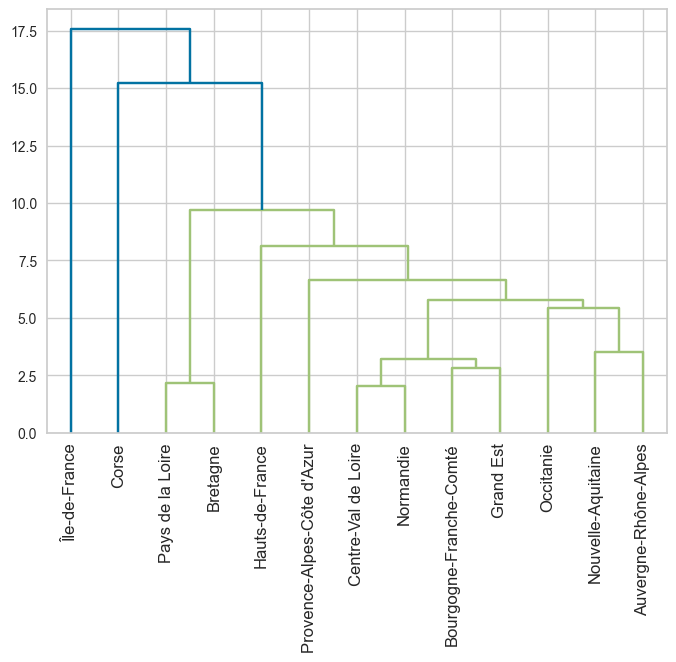

In [174]:
labels = data['Libellé de la région'].to_numpy()
labels = np.delete(labels, [x in outre_mer for x in labels])
Z = linkage(y = subdata2, method='centroid', metric='euclidean');
dendrogram(Z, labels = labels, leaf_rotation = 90);

[0 1 1 1 1 1 0 0 1 1 1 1 2]


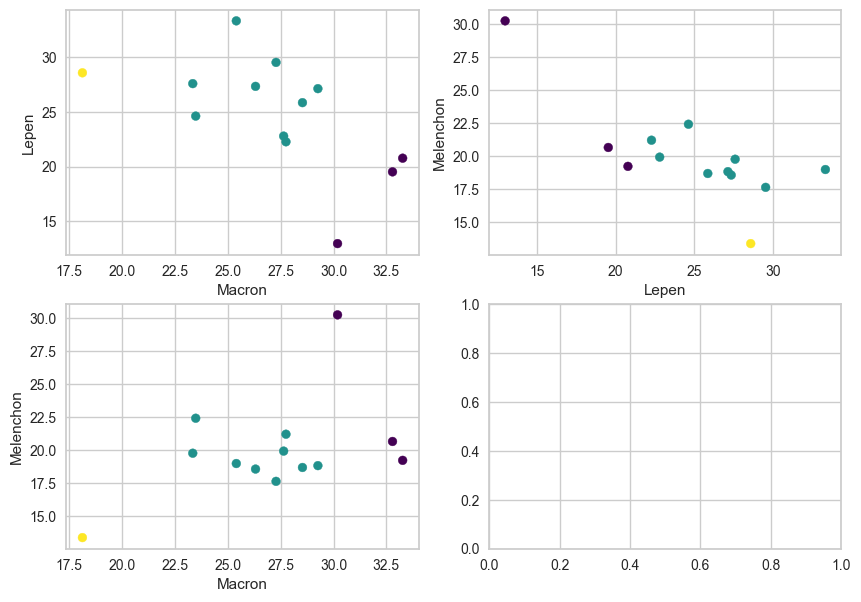

In [175]:
hierarchical_cluster = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward')
clusters_hierarchiques = hierarchical_cluster.fit_predict(subdata2)
print(clusters_hierarchiques)

fig, axs = plt.subplots(2, 2, figsize = (10,7))
axs[0,0].scatter(subdata2[:, 2], subdata2[:, 4], c=clusters_hierarchiques, s=40, cmap='viridis')
axs[0,0].set_xlabel('Macron')
axs[0,0].set_ylabel('Lepen')
axs[0,1].scatter(subdata2[:, 4], subdata2[:, 6], c=clusters_hierarchiques, s=40, cmap='viridis')
axs[0,1].set_xlabel('Lepen')
axs[0,1].set_ylabel('Melenchon')
axs[1,0].scatter(subdata2[:, 2], subdata2[:, 6], c=clusters_hierarchiques, s=40, cmap='viridis')
axs[1,0].set_xlabel('Macron')
axs[1,0].set_ylabel('Melenchon')
plt.show()

3 clusters semble approprié pour la France métropolitaine. Le cluster Jaune a favorisé Marine Lepen, Le cluster violet Emmanuel Macron et le cluster bleu est plus équilibré. On obtient une séparation plus fine des régions de France métropolitaine par rapport aux modèles avec les régions d'outre mer.

## 3.2 Séléction de modèle pour le clustering hiérarchique

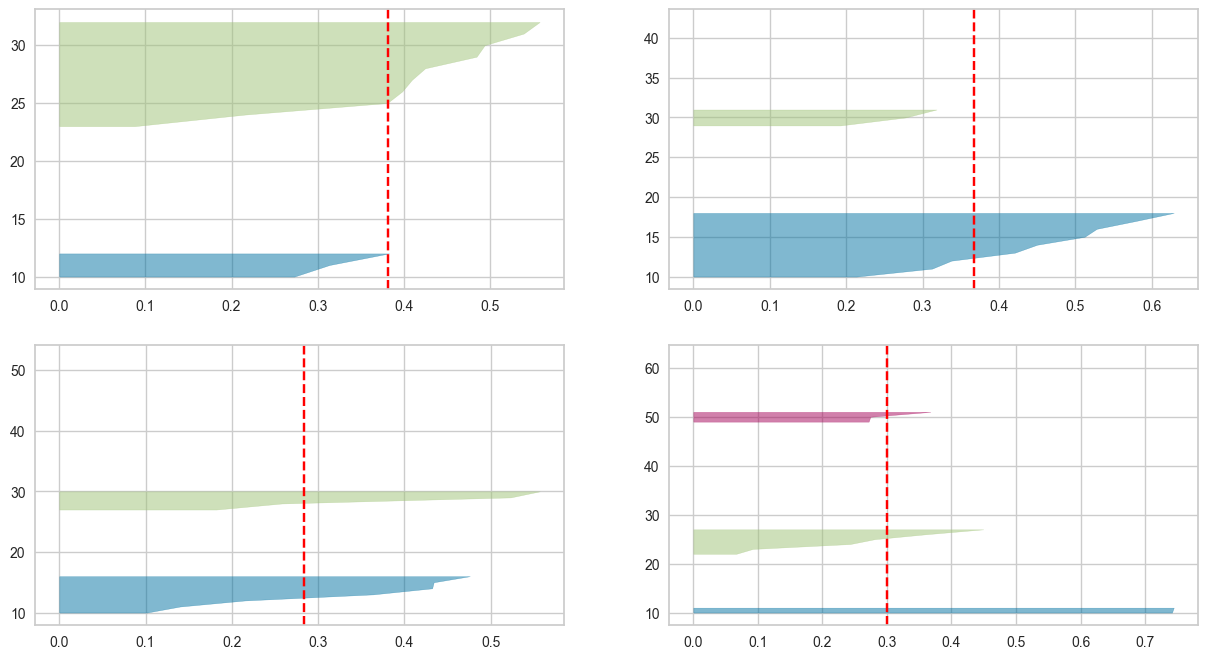

In [176]:
#Silhouette pour déterminer le nombre de clusters optimal
fig, ax = plt.subplots(2, 2, figsize=(15,8))
for i in [2, 3, 4, 5]:
    '''
    Create KMeans instance for different number of clusters
    '''
    km = KMeans(n_clusters=i, init='k-means++', n_init=10, max_iter=100, random_state=42)
    q, mod = divmod(i, 2) #quotient et reste dans la division euclidienne par 2 pour les coordonnées sur la figure
    '''
    Create SilhouetteVisualizer instance with KMeans instance
    Fit the visualizer
    '''
    visualizer = SilhouetteVisualizer(km, colors='yellowbrick', ax=ax[q-1][mod])
    visualizer.fit(subdata2)

## 3.3 Gaussian mixtures

In [177]:
gmm = GaussianMixture(n_components=3).fit(subdata2)
clusters = gmm.predict(subdata2)

labels_region_metropolitaines = np.array(['Île-de-France', 'Centre-Val de Loire',
       'Bourgogne-Franche-Comté', 'Normandie', 
       'Hauts-de-France', 'Grand Est', 'Pays de la Loire',
       'Bretagne', 'Nouvelle-Aquitaine', 'Occitanie',
       'Auvergne-Rhône-Alpes', "Provence-Alpes-Côte d'Azur", 'Corse'])

pd.DataFrame(data = np.transpose([labels_region_metropolitaines, clusters]), columns = ['Libellé de la région', 'Cluster gaussian mixtures'])

,Libellé de la région,Cluster gaussian mixtures
0,Île-de-France,2
1,Centre-Val de Loire,1
2,Bourgogne-Franche-Comté,1
3,Normandie,1
4,Hauts-de-France,1
5,Grand Est,1
6,Pays de la Loire,1
7,Bretagne,1
8,Nouvelle-Aquitaine,1
9,Occitanie,0


## 3.4 Séléction de modèle pour les gaussian mixtures

In [178]:
#Score BIC
from sklearn.model_selection import GridSearchCV

def gmm_bic_score(estimator, X):
    return -estimator.bic(X) # Negatif car GridSearchCV cherche un score à maximiser


param_grid = {
    "n_components": range(1, 7),
    "covariance_type": ["spherical", "diag"],
}
grid_search = GridSearchCV(
    GaussianMixture(), param_grid=param_grid, scoring=gmm_bic_score
)
grid_search.fit(subdata2)

df = pd.DataFrame(grid_search.cv_results_)[
    ["param_n_components", "param_covariance_type", "mean_test_score"]
]
df["mean_test_score"] = -df["mean_test_score"]
df = df.rename(
    columns={
        "param_n_components": "Number of components",
        "param_covariance_type": "Type of covariance",
        "mean_test_score": "BIC score",
    }
)
df.sort_values(by="BIC score").head()

,Number of components,Type of covariance,BIC score
6,1,diag,138.097498
7,2,diag,166.937394
0,1,spherical,166.985810
1,2,spherical,212.815122
8,3,diag,214.190310


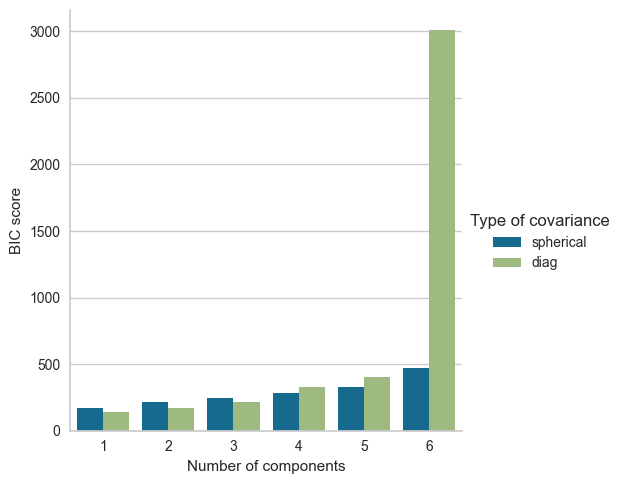

In [179]:
sns.catplot(
    data=df,
    kind="bar",
    x="Number of components",
    y="BIC score",
    hue="Type of covariance",
)
plt.show()